In [7]:
import glob
import matplotlib.pyplot as plt
import json
import os

%matplotlib inline

In [8]:
def load_results(run_dir, metrics = ["loss", "acc"]):
    with open(os.path.join(run_dir, 'trace.txt'), 'r') as f:
        reslines = f.readlines()
        res = [json.loads(x) for x in reslines]
    
    results_for_metric = {}
    for m in metrics:
        epoch_metrics = {"train": [], "val": []}
        
        for datum in res:
            epoch_metrics["train"].append(datum["train"][m])
            epoch_metrics["val"].append(datum["val"][m])
        results_for_metric[m] = epoch_metrics

    return results_for_metric

def plot_results_for_folder_list(result_folders, metrics, splits, metadata_string):
    for metric in metrics:
        legend = []
        
        if len(result_folders) * len(splits) > 10:
            plt.figure(figsize=(20, 10))
        else:
            plt.figure(figsize=(10,5))
            
        for res in result_folders:

            method_name = res.split('/')[-1]
            metric_results = load_results(res, metrics=[metric])
            for split in splits:
                plt.plot(metric_results[metric][split])
                if len(splits) == 1:
                    legend.append("%s" % (method_name))
                else:
                    legend.append("%s-%s" % (split, method_name))

        plt.legend(legend)
        plt.title("%s_%s_%s" %(metadata_string, metric, ",".join(splits)))
        plt.figure()        
        
def filter_list(all_result_folders, match_string_list):
    output_list = []
    for folder in all_result_folders:
        if all([x in folder for x in match_string_list]):
            output_list.append(folder)
            
    return output_list

In [9]:
PATH_TO_RESULTS="/checkpoint/ramav/runs/ad_hoc_categories_iclr"
metrics = ["loss", "acc"]

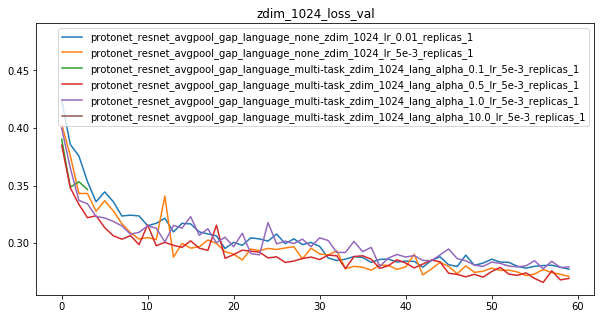

<Figure size 432x288 with 0 Axes>

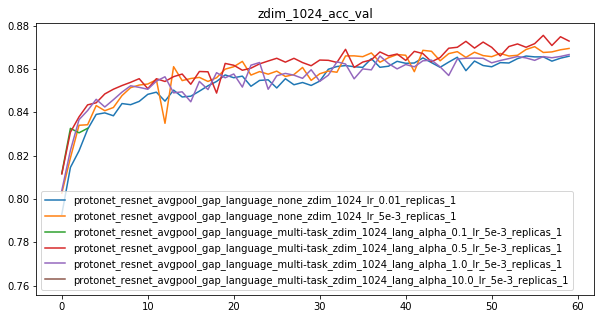

<Figure size 432x288 with 0 Axes>

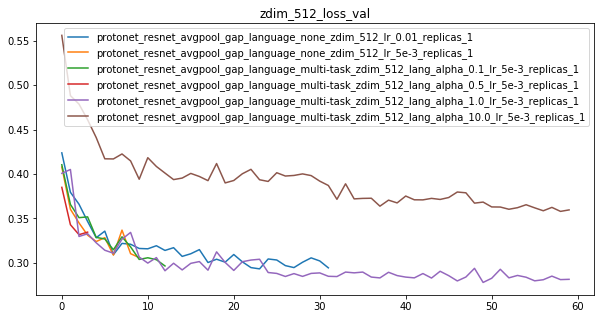

<Figure size 432x288 with 0 Axes>

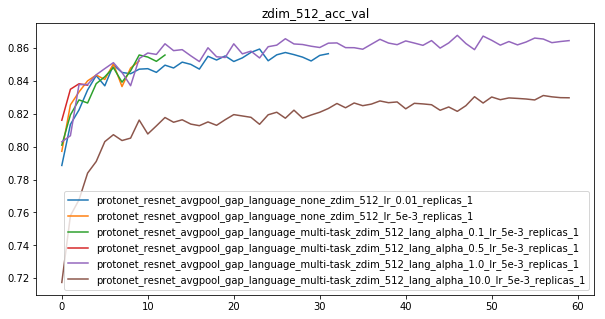

<Figure size 432x288 with 0 Axes>

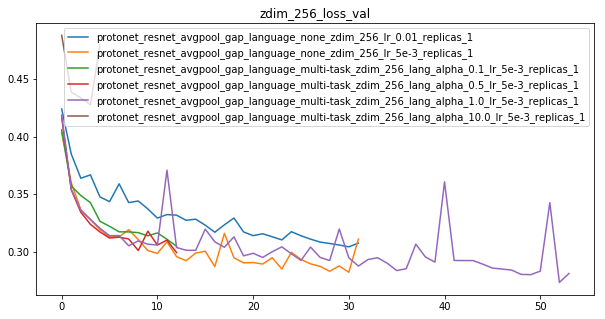

<Figure size 432x288 with 0 Axes>

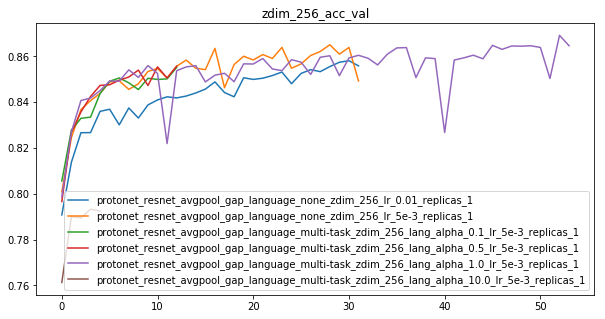

<Figure size 432x288 with 0 Axes>

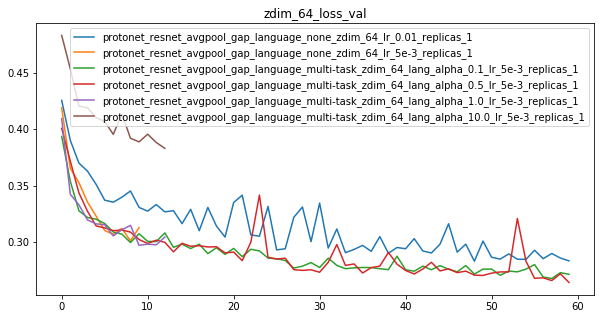

<Figure size 432x288 with 0 Axes>

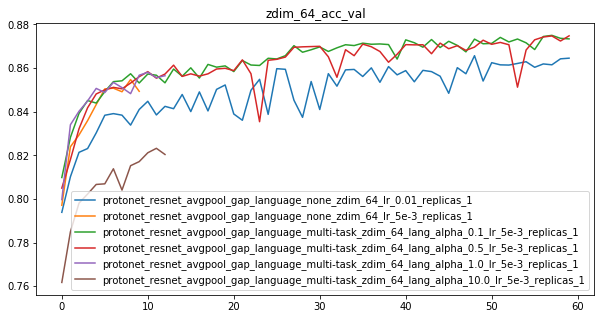

<Figure size 432x288 with 0 Axes>

In [10]:
for filter_str in ["zdim_1024", "zdim_512", "zdim_256", "zdim_64"]:
    all_result_folders = glob.glob(PATH_TO_RESULTS + "/*")
    filter_result_folders = filter_list(all_result_folders, list([filter_str]))
    plot_results_for_folder_list(filter_result_folders, metrics, ["val"], filter_str)

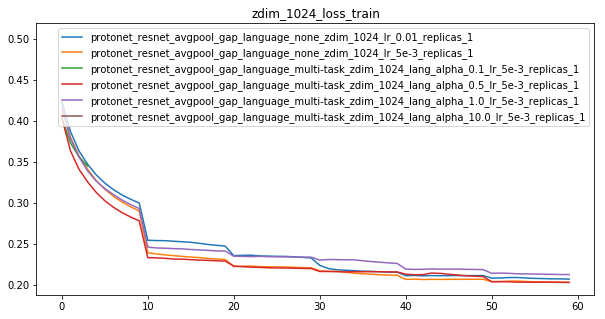

<Figure size 432x288 with 0 Axes>

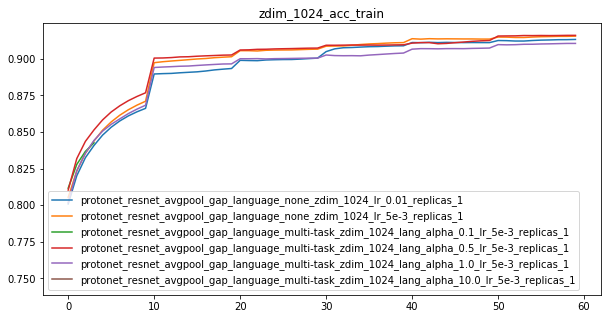

<Figure size 432x288 with 0 Axes>

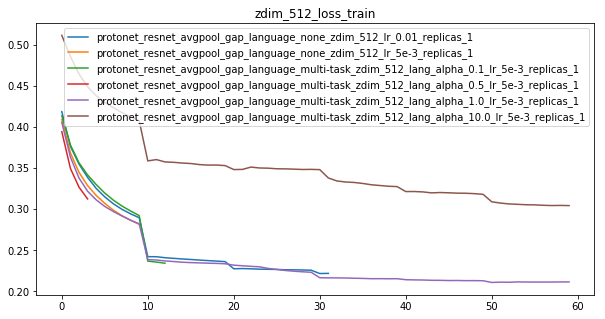

<Figure size 432x288 with 0 Axes>

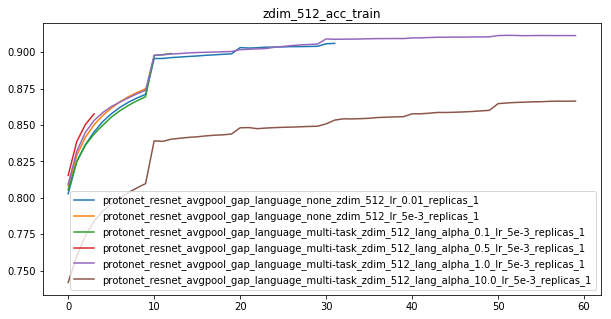

<Figure size 432x288 with 0 Axes>

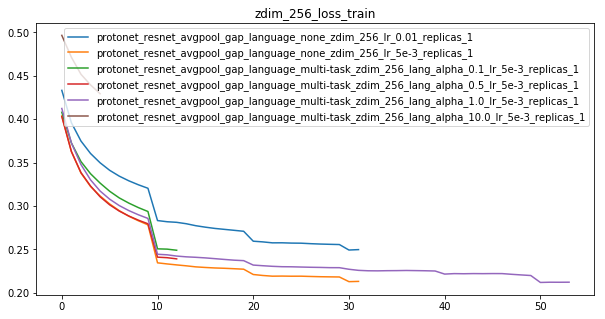

<Figure size 432x288 with 0 Axes>

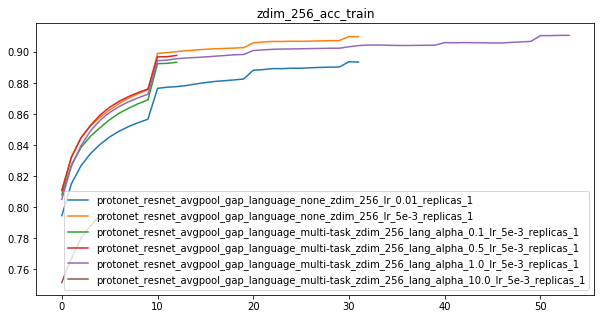

<Figure size 432x288 with 0 Axes>

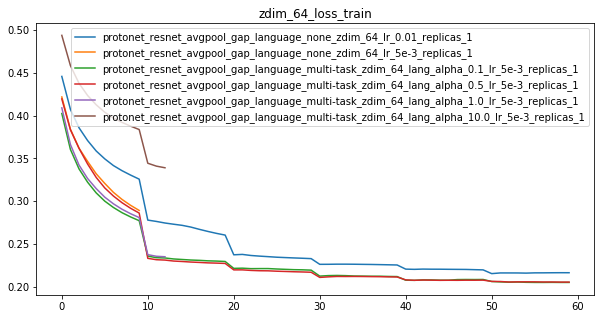

<Figure size 432x288 with 0 Axes>

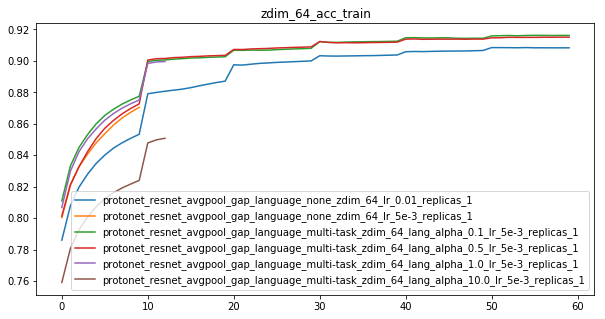

<Figure size 432x288 with 0 Axes>

In [12]:
for filter_str in ["zdim_1024", "zdim_512", "zdim_256", "zdim_64"]:
    all_result_folders = glob.glob(PATH_TO_RESULTS + "/*")
    filter_result_folders = filter_list(all_result_folders, list([filter_str]))
    plot_results_for_folder_list(filter_result_folders, metrics, ["train"], filter_str)